In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports 
from src.preprocessing import *
from src.models import *
from src.torch_util import *
from src.dataloader import *
from src.train_eval_helpers import *
from src.plots import *
%load_ext autoreload
%autoreload 2
#checking gpu status

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 180
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
models = load_models(PATH='../output/training_output/bigger_batchsize_display_test/')
train, val, acc, auc, f1 = load_losses(PATH='../output/training_output/bigger_batchsize_display_test/dicts')

Models & weights loaded
Values loaded


In [130]:
train_df = pd.DataFrame.from_dict(train, orient='columns')#, dtype=None, columns=None)
train_df['epoch']=range(0,500)
val_df = pd.DataFrame.from_dict(val, orient='columns')#, dtype=None, columns=None)
val_df['epoch']=range(0,500)
train_melt = train_df.melt(id_vars='epoch',var_name='seqlen', value_name ='train_loss')
#train_melt.merge(val_melt, on ='epoch')

In [146]:
a = []
e = []
for k in [12,13,14,15,16]:
    a+= [k]*500
    e+= range(500)
    
blank = pd.DataFrame( data = {'epoch':e,'seqlen':a} ,columns=['epoch','seqlen'])
x=pd.merge(blank, val_melt, left_index=True, right_index=True, suffixes=('', '_delme'))
x = x[[c for c in x.columns if not c.endswith('_delme')]]


In [183]:
from src.plots import *
loss_df = get_losses_df(PATH='../output/training_output/bigger_batchsize_display_test/dicts')

Values loaded


In [170]:
import seaborn as sns
#sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
display(dots.sample(5))
# Plot the lines on two facets
#sns.relplot(
#    data=dots,
#    x="time", y="firing_rate",
#    hue="coherence", size="choice", col="align",
#    kind="line", size_order=["T1", "T2"], palette=palette,
#    height=5, aspect=.75, facet_kws=dict(sharex=False),
#)

,align,choice,time,coherence,firing_rate
576,sacc,T1,180,0.0,14.442231
460,sacc,T1,-220,3.2,51.462516
692,sacc,T2,-200,0.0,42.191964
64,dots,T1,120,25.6,29.696673
19,dots,T1,-20,3.2,31.101190


In [213]:
copy = loss_df.copy()
copy['value'] = copy['value']+0.05


In [217]:
xd = loss_df.copy()
for x in [0.05,-0.05, -0.03, 0.03]:
    copy = loss_df.copy()
    copy['value'] = copy['value']+0.05
    xd = pd.concat([copy,xd])

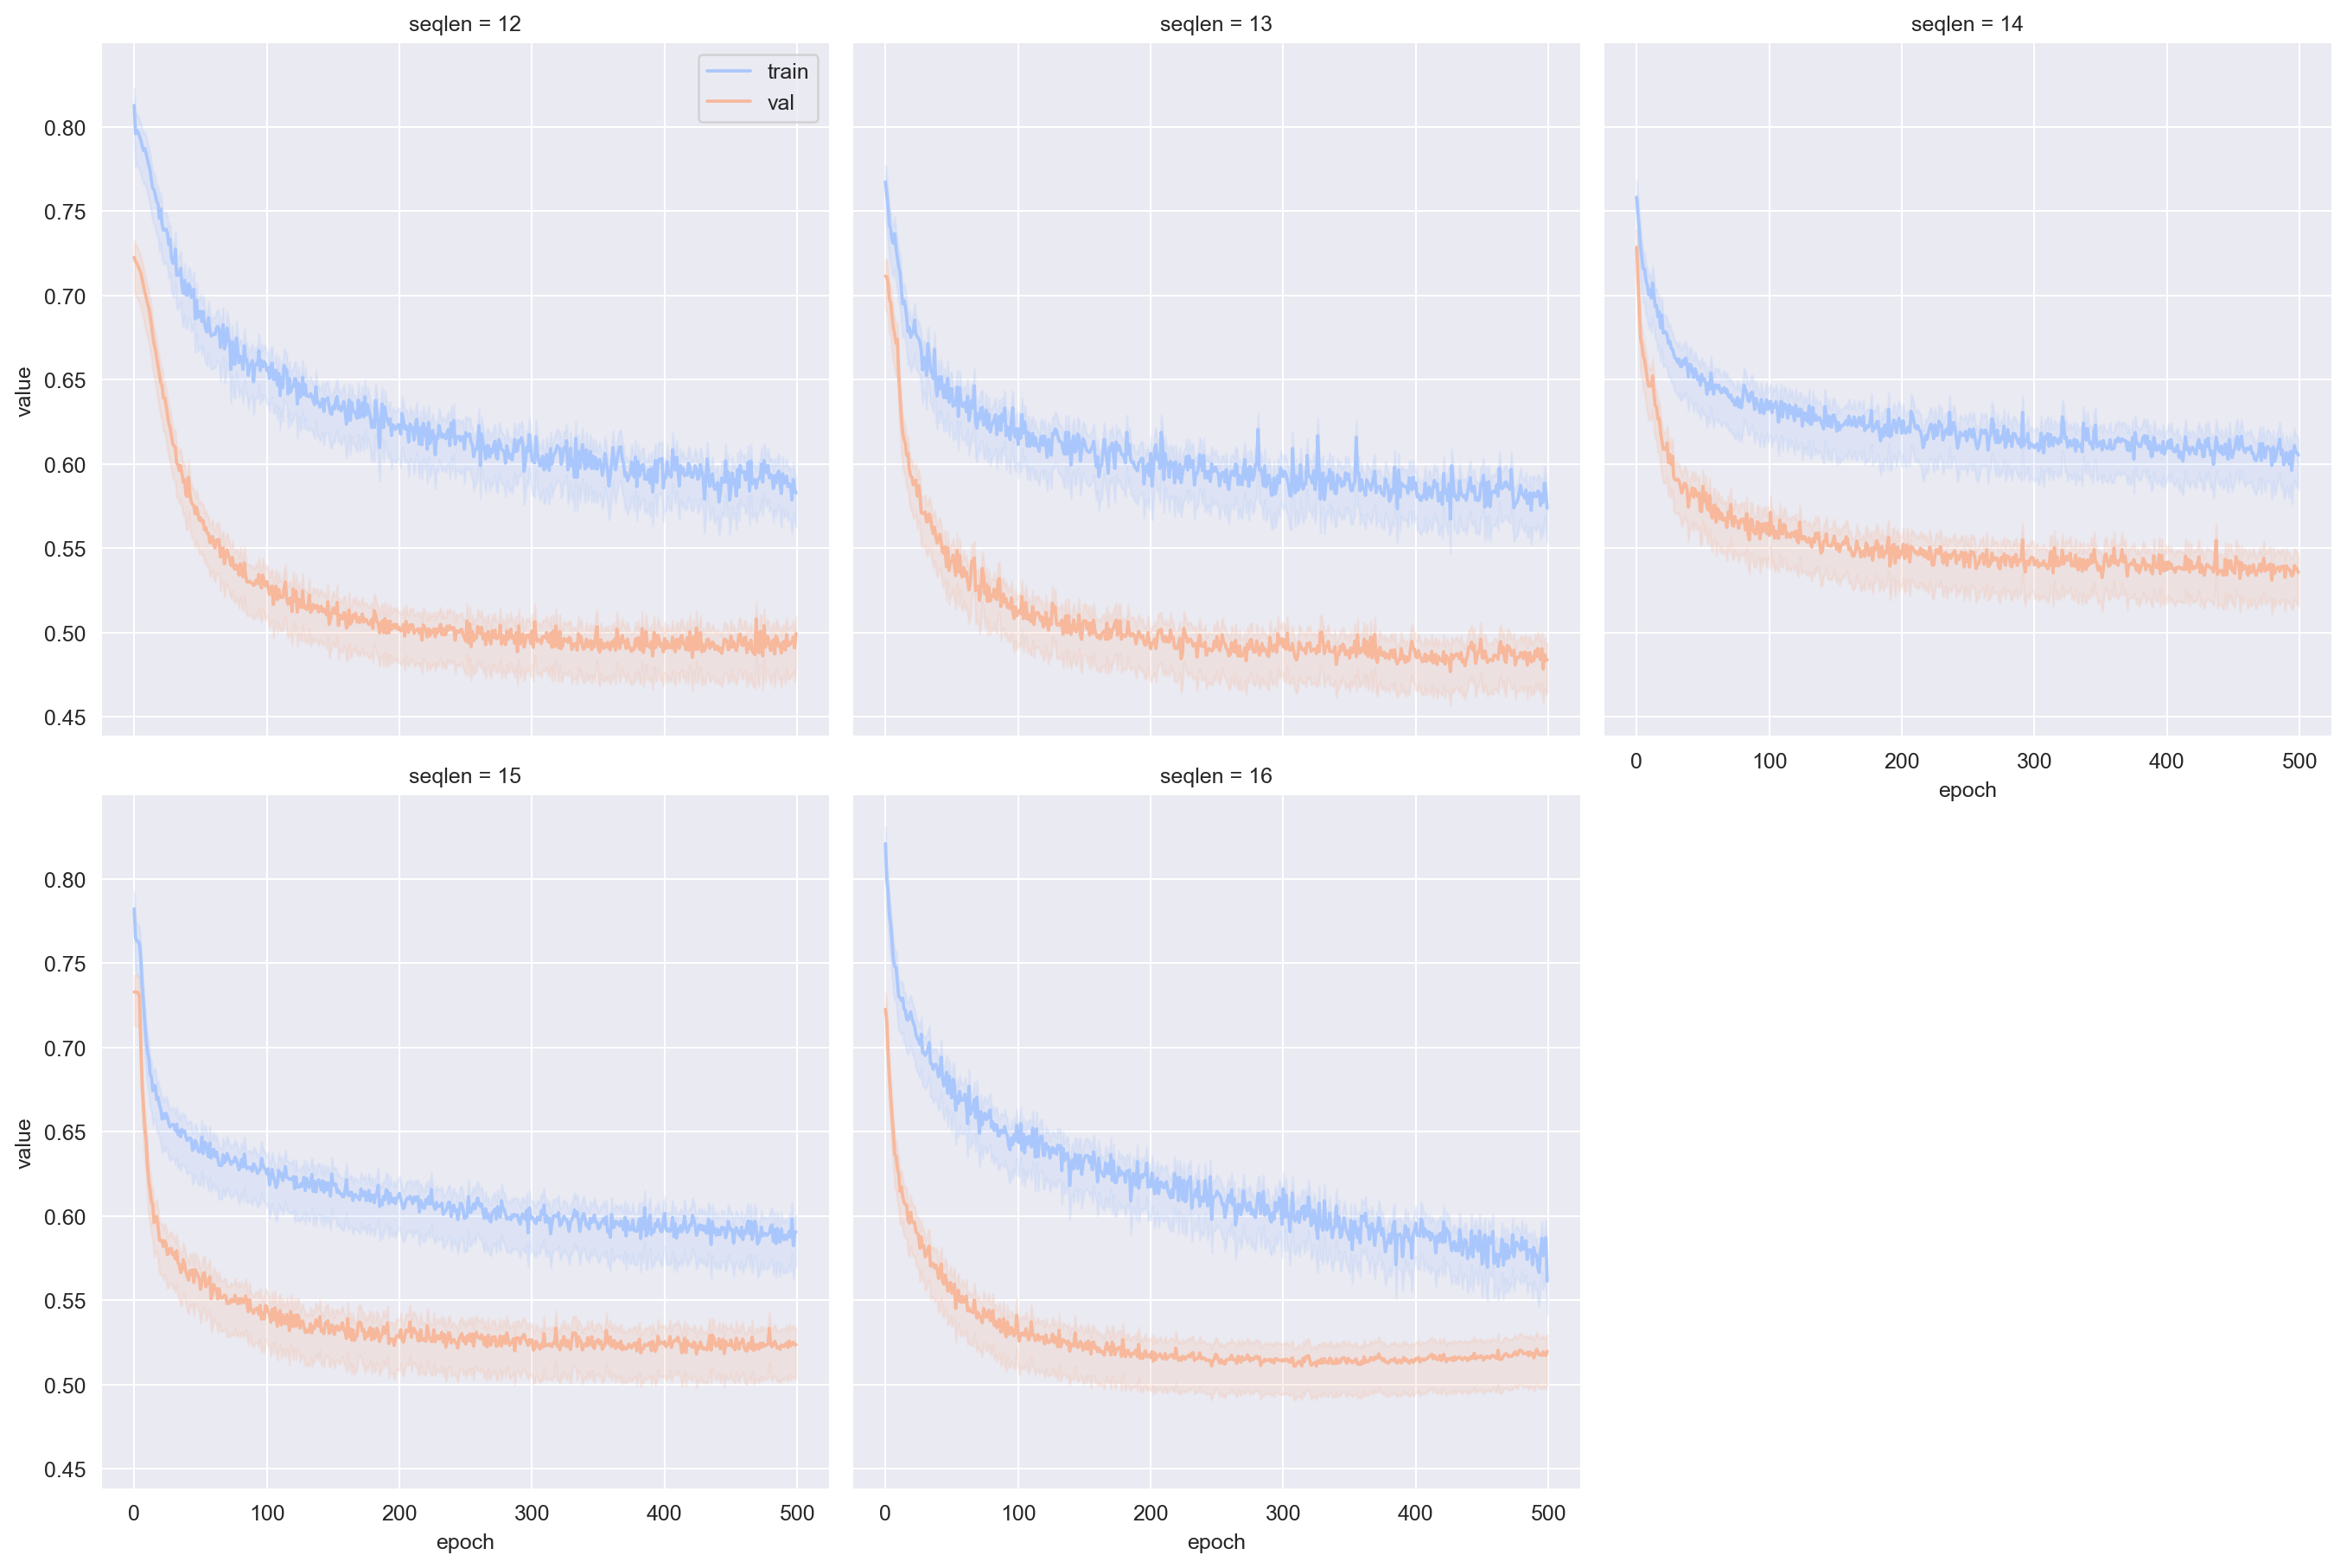

In [218]:
sns.set_palette(sns.color_palette('coolwarm', n_colors=2))
grid = sns.relplot(data=xd.query('type=="train_loss" or type=="val_loss"'),
            x='epoch', y='value',hue='type',legend=None,
            kind='line',col='seqlen', col_wrap=3)
grid.axes[0].legend(['train','val'],loc='best')


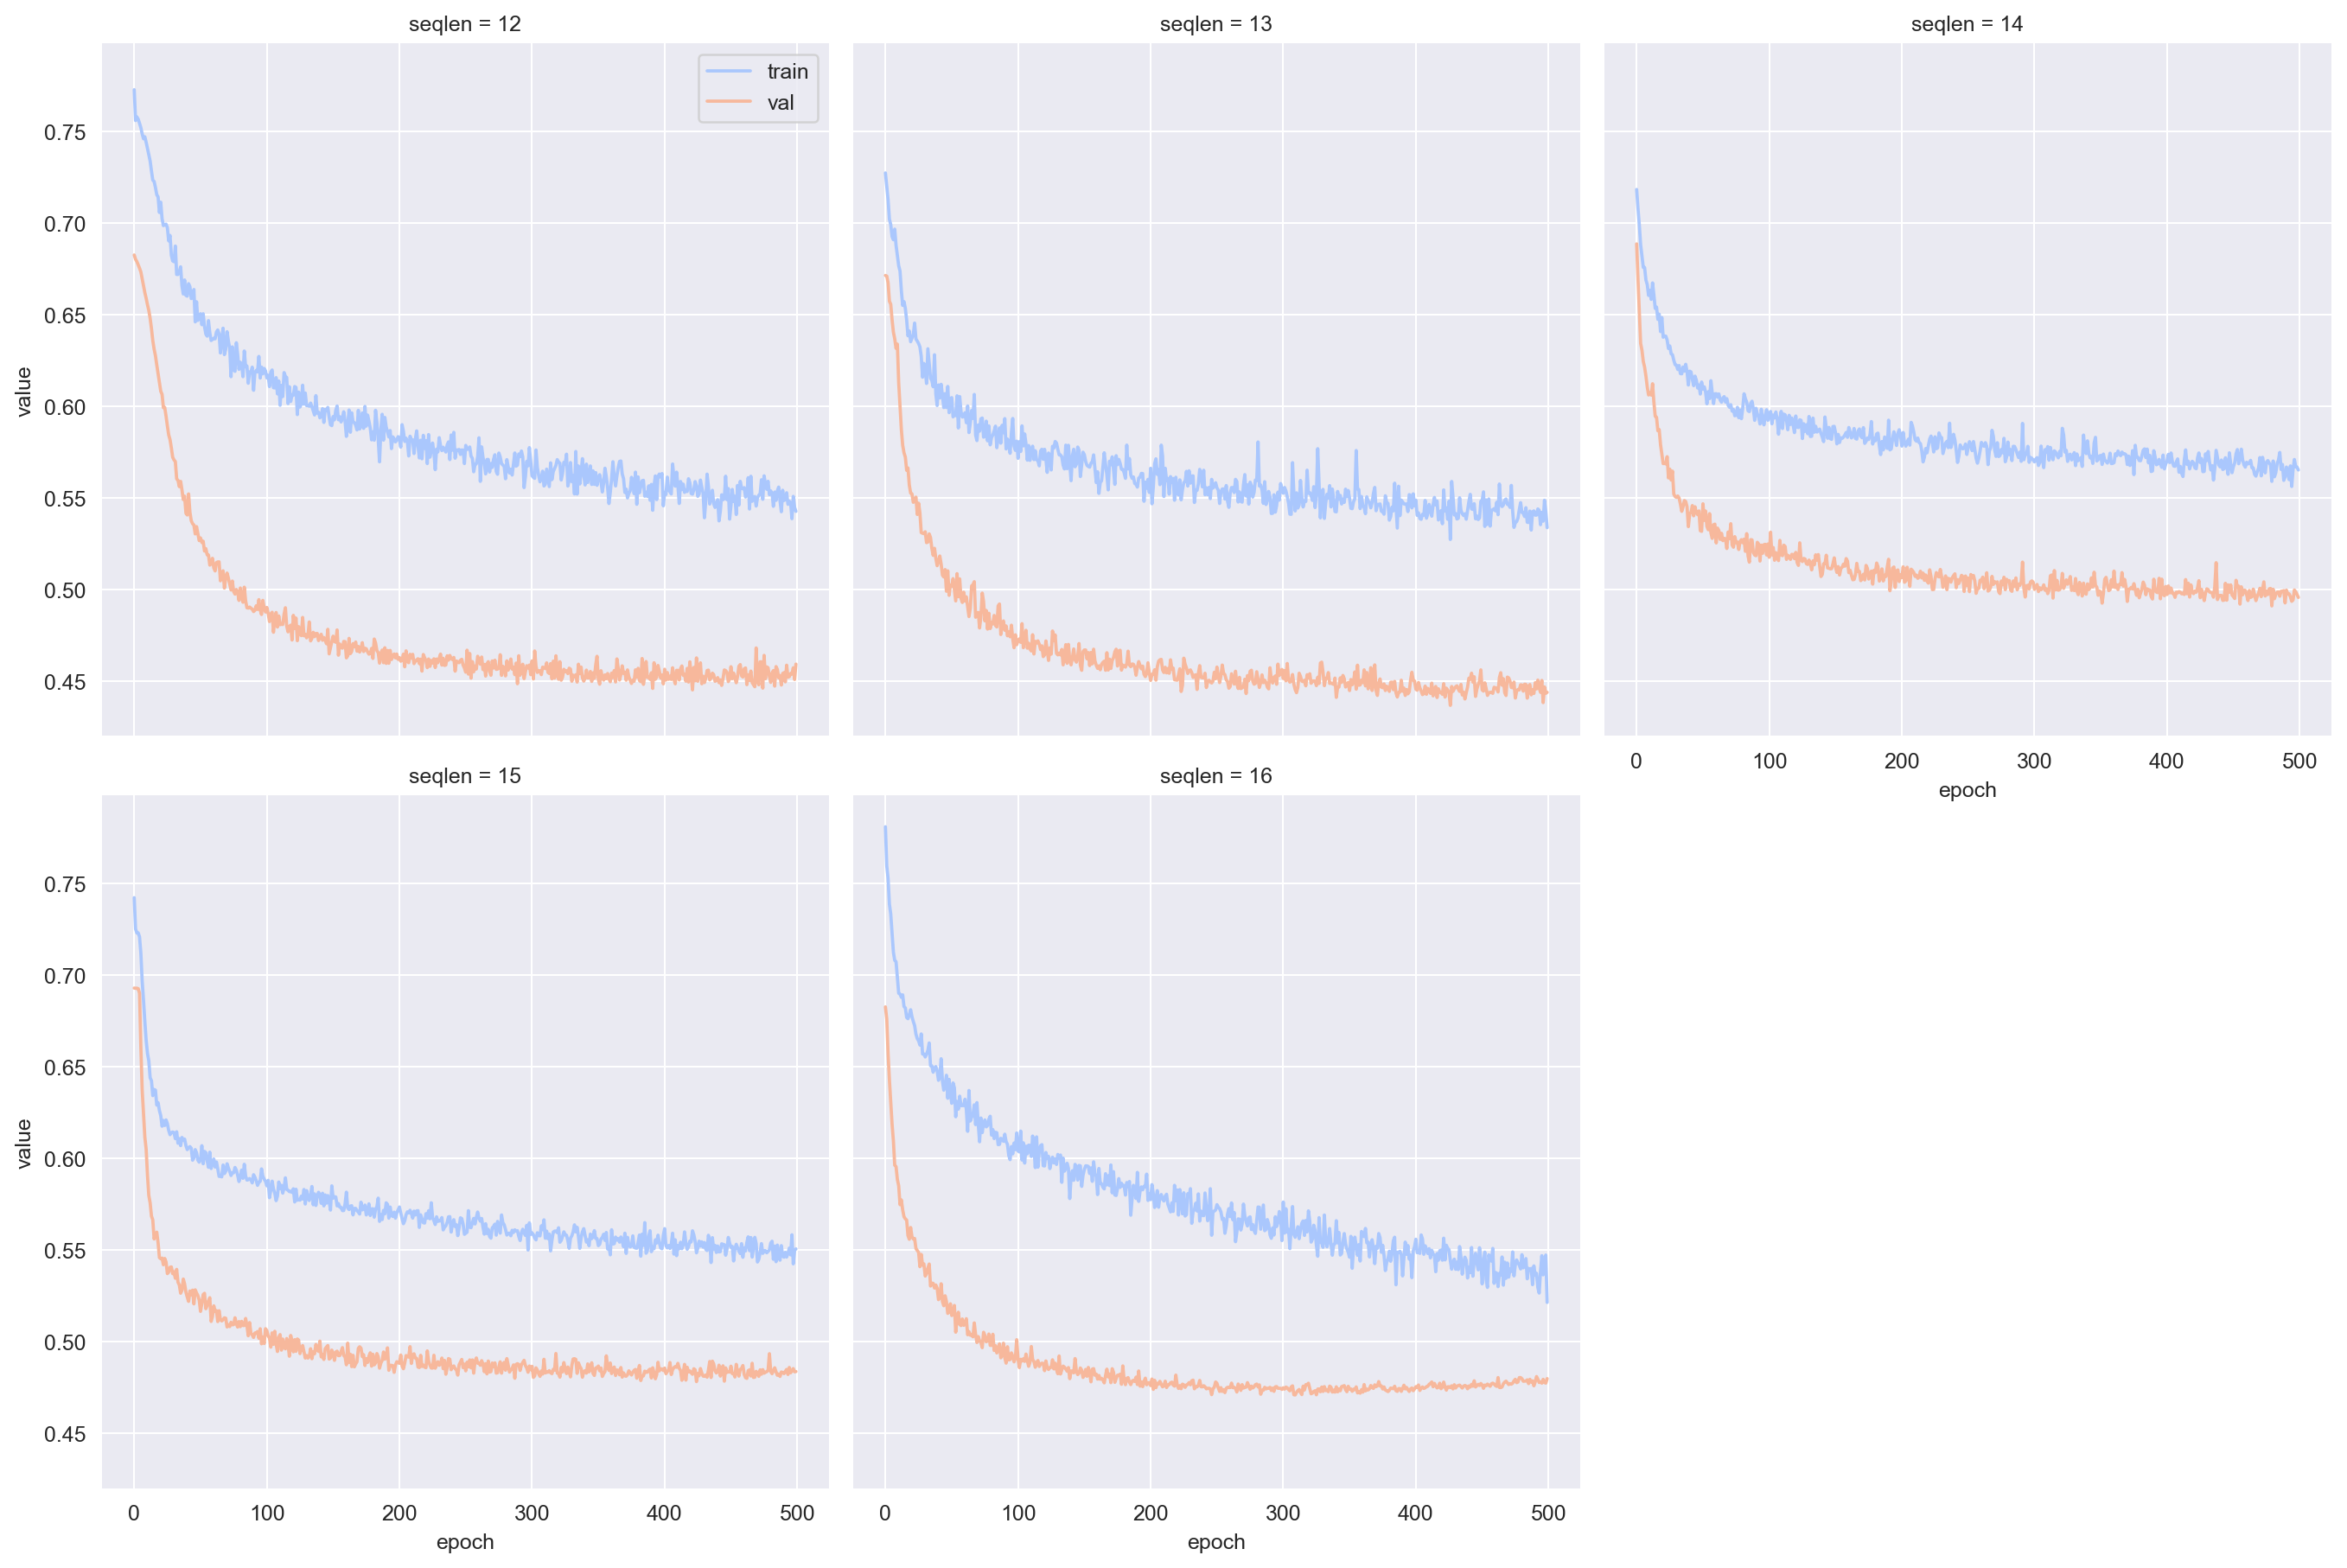

In [211]:
sns.set_palette(sns.color_palette('coolwarm', n_colors=2))
grid = sns.relplot(data=loss_df.query('type=="train_loss" or type=="val_loss"'),
            x='epoch', y='value',hue='type',legend=None,
            kind='line',col='seqlen', col_wrap=3)
grid.axes[0].legend(['train','val'],loc='best')

#g_rel.set_axis_labels("Period","Mean (relative) pageviews");
#g_rel.set_xticklabels(["Period before \n quarantine start","Period after \n quarantine start" ],size="small")
#g_rel.set_titles(col_template = "{col_name}",weight=535,size="small");
#g_rel.fig.tight_layout(w_pad=1.1);
#plt.subplots_adjust(top=0.95);
#g_rel.fig.suptitle('Mean (relative) daily pageviews for each topic \n during a given period of 35 days with respect to quarantine start',
#                  fontsize='x-large',weight=575);